In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from sklearn.decomposition import PCA

from ShapeDescs import *
from utils import plot_sample_cluster, cluster_sizes
from ModelSelection import select_cpf, select_kmean, select_models

In [3]:
# datapath = "/Users/emmanuelakeweje/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/316L-reused/316L-reused/Individual Particle Images"
# all_files = [file for file in os.listdir(datapath) if file.endswith('.bmp')]
# # samples = all_files[:1000]
# datapath2 = '/Users/emmanuelakeweje/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/316L-reused/316L-reused/Sample Particle Images'

# for img in all_files[:1000]:
#     shutil.copy(os.path.join(datapath, img),
#                 os.path.join(datapath2, img))

In [6]:
datapath = '/Users/emmanuelakeweje/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/316L-reused/316L-reused/Sample Particle Images'

In [11]:
len(os.listdir(datapath))

1000

The implementations of shape descriptors are in the py scrpit `ShapeDescs.py`. The descriptors implemented are:
- Hu Moments (`HuMoments`),
- Zernike Moments (`ZernikeMoments`),
- SIFT (`SIFT`),
- Fourier Descriptor (`FourierDescriptor`),
- Elliptical Fourier Descriptor (`EllipticFourierDesc`),
- Shape Context (`ShapeContext`), and
- Centroid Distance Function (`CentroidDist`).

## Usage
The usage of the implemented shape descriptors are quite similar. 
- First create the shape descriptor object. `DescObj = <DescriptorClass>(datapath)`. Aside `datapath`, which is the path to the directory where the dataset is stored, some of the shape descriptors have other optional parameter. Use `?<DescriptorClass>` to check for the optional parameter.
- Next, compute the shape descriptor features using the method `get_desc()`.
- The computed shape descriptors are stored in the attribute `descs`.

Now any multivariate clustering method can be applied to the features obtained.

Using Hu Moments to illustrate:

In [9]:
DescObj = HuMoments(datapath)
DescObj.get_decs()
DescObj.descs

array([[ 6.57047843e-04,  7.30100775e-09,  8.69660277e-12, ...,
         3.09185330e-24,  8.68749766e-17, -7.26373691e-25],
       [ 6.24329625e-04,  1.81473573e-10,  2.41396087e-14, ...,
        -9.77274615e-35, -6.17164980e-24,  8.66755901e-35],
       [ 6.36450084e-04,  1.02146591e-08,  5.21364407e-12, ...,
        -2.64221629e-27, -1.57923857e-18, -1.51934615e-26],
       ...,
       [ 8.03979600e-04,  2.26740839e-07,  2.86695260e-11, ...,
        -1.55721376e-23, -9.62174083e-16,  6.36502438e-24],
       [ 6.30838861e-04,  1.86990303e-09,  2.96105099e-12, ...,
         3.29874798e-27,  1.49509623e-19,  4.45469746e-27],
       [ 6.30199817e-04,  7.02943900e-09,  5.74554110e-13, ...,
         3.07394506e-29,  7.38705019e-20,  8.50991662e-29]])

In [10]:
DescObj.descs.shape

(1000, 7)

In [12]:
?HuMoments

Init signature: HuMoments(datapath) -> None
Docstring:     
datapath : string
    path of directory where the image data is stored.
File:           ~/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/ea_analysis/scripts/ShapeDescs.py
Type:           type
Subclasses:     

In [13]:
?ZernikeMoments

Init signature: ZernikeMoments(datapath, degree=8) -> None
Docstring:     
datapath : string
    path of directory where the image data is stored.
Degree : integer, optional
    Maximum degree to use (default: 8)
File:           ~/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/ea_analysis/scripts/ShapeDescs.py
Type:           type
Subclasses:     

## Multivariate Clustering

I used the popular Kmeans (https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) and a density based clusteirng algorithm, CPF clustering (https://github.com/tobinjo96/CPFcluster).

To ilustrate usage, I will apply Kmeans and CPF to the features generated by Hu moments.

In [14]:
from sklearn.cluster import KMeans #import Kmeans
from cpf_core import CPFcluster #import CPF

In [16]:
kmeans_hm = KMeans(n_clusters = 5, n_init= 'auto')
kmeans_hm.fit(DescObj.descs)
kmeans_hm.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,

### Use custom function `cluster_sizes(<data_labels>)` to calculate cluster distribution.

In [17]:
cluster_sizes(kmeans_hm.labels_)

[921, 13, 3, 3, 60]

### use custom function `plot_sample_cluster(...)` to plot random samples from n-th cluster.

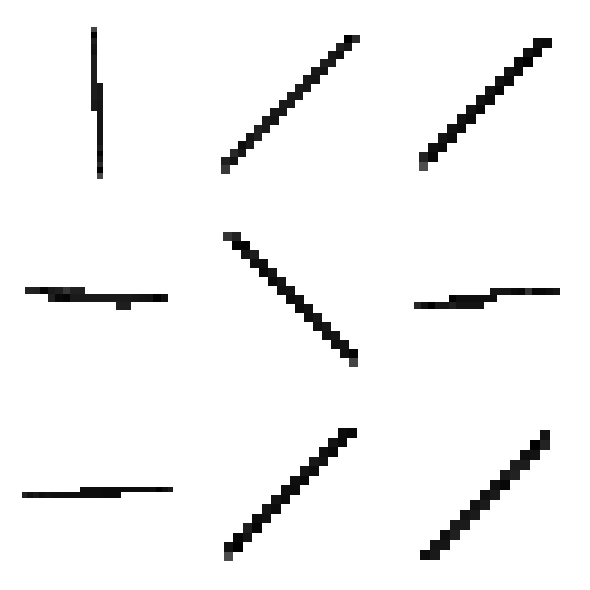

In [18]:
plot_sample_cluster(datapath, kmeans_hm.labels_, 1, (3,3))

In [21]:
cpf_hu = CPFcluster(k = 10, rho = 0.2, n_jobs= 10) #set k to around sqrt(sample size)
cpf_hu.fit(DescObj.descs)
cpf_hu.labels_

array([ 0, 10, 15, 11, 16, 17,  1, 18, 19, 20,  0, 21, 22, 23,  2, 24, 15,
       25,  3,  4, 21, 15, 26, 12, 19, 25,  5, 10, 26,  6, 34, 36, 12,  3,
       27, 13, 11, 16, 24, 21, 28, 17, 11,  4, 29, 16, 13, 30, 22, 29, 37,
        7, 36, 28, 26, 23, 18, 10, 30, 30, 36,  4, 26, 14, 34,  2, 30, 31,
       24, 17, 22,  0, 16, 27, 12, 15,  4, 12, 21, 10,  1, 14, 25,  3, 22,
       15, 19, 25, 36,  4, 12,  1, 21,  5, 13, 17, 13, 22, 30, 34,  2, 15,
       34, 21,  8, 36, 20, 23,  8,  1, 32, 11, 34, 34, 27, 28,  3, 23, 28,
       21,  1, 11,  1, 34,  6, 27, 13, 14, 36, 10, 17, 12, 23, 26, 21,  9,
       21, 11, 12, 12,  9,  5, 32,  4, 12, 36,  8, 23, 19, 24, 15, 14, 15,
       14, 10, 21,  2,  8, 15,  1, 18, 27, 22, 26,  1,  7, 27, 19, 22, 23,
       33, 10, 19, 34, 24, 34, 21, 20, 23, 10, 32, 34, 26,  1,  5, 11, 19,
        5, 15, 21, 25, 18, 10,  7, 23, 17, 36, 24, 14,  9, 19, 23,  8, 31,
        2, 37,  3, 36, 15, 32, 15, 37, 32, 25, 17, 22, 12, 14,  6, 24, 13,
       11,  8, 26, 30,  8

In [22]:
cluster_sizes(cpf_hu.labels_)

[28,
 21,
 14,
 13,
 30,
 22,
 16,
 26,
 23,
 15,
 39,
 35,
 23,
 29,
 36,
 40,
 15,
 23,
 21,
 28,
 17,
 37,
 30,
 32,
 29,
 32,
 37,
 37,
 14,
 23,
 50,
 28,
 15,
 20,
 42,
 1,
 39,
 14,
 6]

## Grid search for parameter selection.

In [23]:
opt_par = select_models(DescObj.descs, 'hu')

100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


In [25]:
opt_par

(4, 100, 0.1)

In [32]:
cpf_labels = np.load('cpf/hu_db-labels.npy')
cpf_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
cluster_sizes(cpf_labels)

[980, 20]

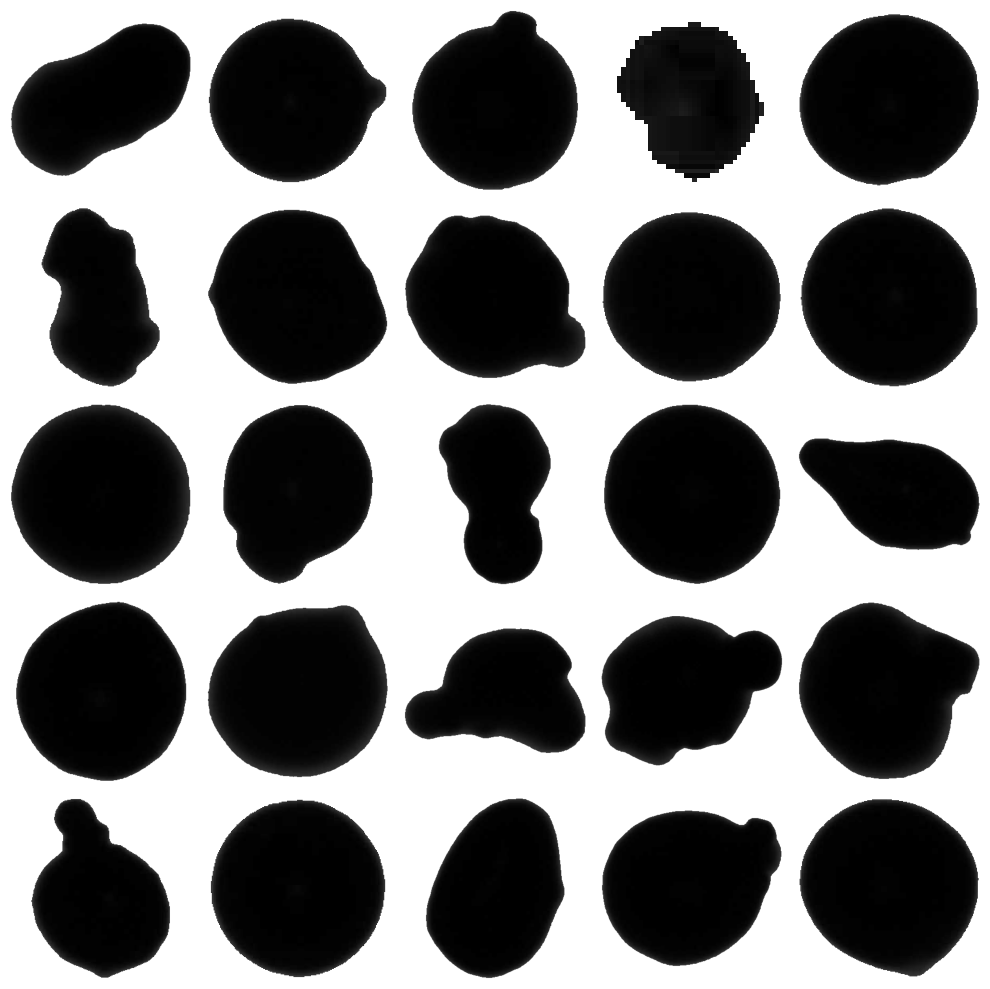

In [34]:
plot_sample_cluster(datapath, cpf_labels, 0)

/Users/emmanuelakeweje/Library/CloudStorage/OneDrive-TrinityCollegeDublin/Documents/Research Work/ShapeAnalysisForMgPowder/ea_analysis/scripts/utils.py:20: UserWarning: The cluster has only 20 samples.
  warnings.warn(f"The cluster has only {len(clstr)} samples.")


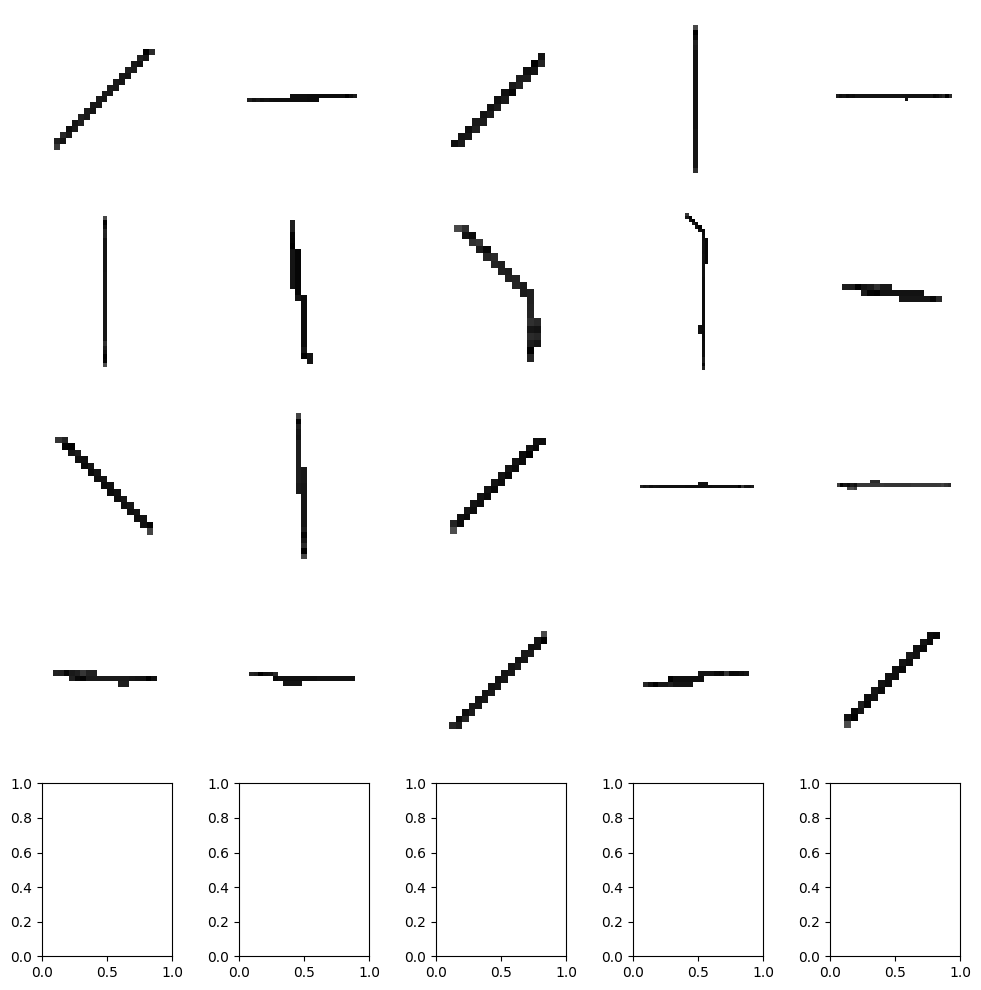

In [33]:
plot_sample_cluster(datapath, cpf_labels, 1)